# Descenso del gradiente

## Tarea

Crear el modelo que separe a los dos circulos que se presentan a continuación usando regresión logística

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets        import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

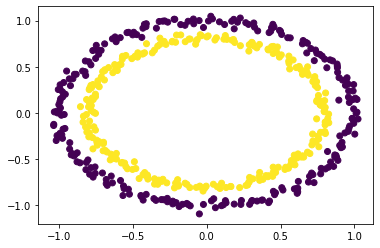

In [2]:
C,c = make_circles(500, random_state=1234, noise=0.03) 

plt.scatter(C[:,0],C[:,1],c=c)

En la imagen se pueden ver dos clases pero, al menos ahí, no hay forma de que una línea  pueda separarlos, entonces los voy a transformar usando coordenadas polares.

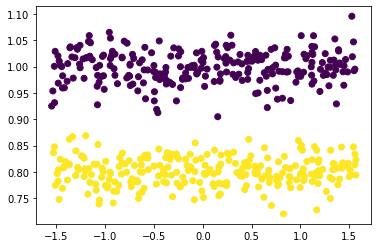

In [3]:
Xu = np.zeros_like(C)
Xu[:,0], Xu[:,1] = np.arctan(C[:,1]/C[:,0]), np.linalg.norm(C,axis=1)
plt.scatter(Xu[:,0], Xu[:,1], c=c)

Ahora el arreglo `Xu` son los círculos reexpresados en estas coordenadas.

In [4]:
def gradiente(w,X,y):
    h = sigmoide(np.dot(X,w))
    z = h.T - y
    gr = np.dot(X.T, z.T)
    return gr

sigmoide = lambda z: 1/(1 + np.exp(-z))
loglikelihood = lambda H,y: (-np.dot(y,np.log(H)) - np.dot((1-y),np.log(1-H))).mean()

def grad_desc(X,y,iters, a=0.01,t=100, tol=1e-4):
    #gr = lambda w, X, y: dot(X.T, (sigmoide(w.T,X.T) - y).T)
    n, d = X.shape
    #print(n,d)
    pesos = np.random.ranf((1,d))
    w = pesos[-1]
    #print(w)
    h  = sigmoide(np.dot(X,w))
    j  = loglikelihood(h,y)
    costos = [j]
    for i in range(iters):
        gr = gradiente(w,X,y)
        w -= a*gr
        pesos  = np.vstack((pesos,w))
        h  = sigmoide(np.dot(X,w))
        j  = loglikelihood(h,y)
        costos.append(j)
        if(i%t==0 or j < tol):
            print('{0}:{1}'.format(i,j))
        if(j<tol):
            break
    return w, pesos, costos

In [5]:
Xb = np.hstack((np.ones(len(Xu)).reshape(-1,1), Xu ))
Ct, Cp, ct, cp = train_test_split(Xb, c)
wf, W, J = grad_desc(Ct,ct,100000,0.0001, t=10000)

0:280.96995542523786
10000:141.8671029209118
20000:94.68864711461512
30000:70.86138451327025
40000:56.755464562035016
50000:47.48560683012468
60000:40.9409552558408
70000:36.07523195985586
80000:32.31461199483141
90000:29.319286120174887


El error al final del entrenamiento fue:

In [6]:
J[-1]

26.875831258521053

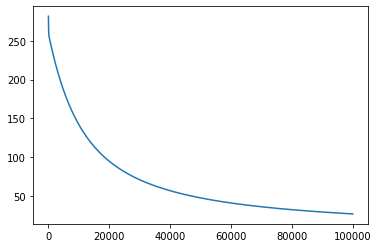

In [7]:
plt.plot(J)

(0.0003997667443695774, -29.15584637661675)

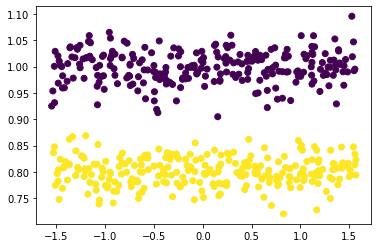

In [8]:
fig, ax = plt.subplots()
plt.scatter(Xu[:,0], Xu[:,1], c=c)
(wf[1], wf[2])

Ahora podemos evaluar nuestro modelo en el conjunto de prueba

In [9]:
h = sigmoide(np.dot(Cp,wf))
print(np.round(h))

[1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0.]


In [10]:
confusion_matrix(np.round(h), cp)

array([[74,  0],
       [ 0, 51]])

In [11]:
loglikelihood(h, cp)

10.651607793910998

Como tiene un error aceptable entonces podemos confiar en usarlo como una máquina de clasificación de estímulos no vistos.

Como nuestro problema requirió que transformaramos los datos, entonces requerimos transformarlos primero para luego pasarlos al clasificador. Para eso vamos a usar la función `trans`

    funcion trans(p,q):
        arr = [ 1, arc_tan(q/p), norma( [p,q] ) ]
        return arr
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


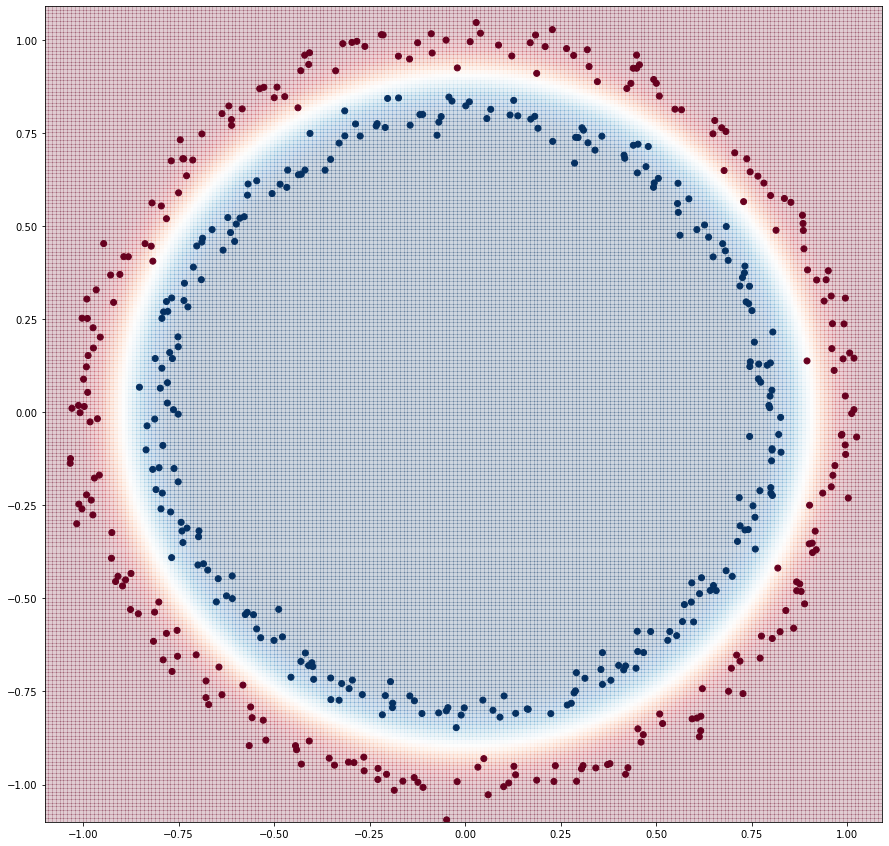

In [51]:
h = 0.01
P = np.arange(-1-.1,1+.1,h)
Q = np.arange(-1-.1,1+.1,h)
Z = np.zeros((len(P), len(Q)))

def trans(p,q):
    try:
        return np.array([1,np.arctan(q/p),np.linalg.norm( np.array([p,q]) )])
    except:
        if(p==0):
            return np.array( [1,0,0] )
fig = plt.figure(figsize=(15,15))
for p in range(len(P)):
    for q in range(len(Q)):
        x,y = P[p], Q[q]
        sc = np.dot(trans(x,y),wf)
        #print(sc)
        Z[p,q] = sigmoide(sc)

cm = plt.cm.RdBu
plt.pcolor(P,Q,Z, cmap=cm, alpha=0.2)
plt.scatter(C[:,0],C[:,1],c=c, cmap = cm)

El cuadro amarillo interpreta todo al interior de él como un 1 y afuera como un 0.

## Red Neuronal